# **Kepler Exoplanet Classification Using Decision Trees and Random Forests**

We begin by classifying Kepler exoplanet candidates using **traditional machine learning methods**. Starting with a single **Decision Tree**, we explore feature importance and baseline performance. To improve generalisation and handle overfitting, we then implement a **Random Forest** ensemble. This notebook demonstrates data preparation, model training, and evaluation, providing a baseline for comparison with neural network approaches in later questions.


## **Libraries**

We begin by importing the Python libraries required to build and evaluate a traditional machine learning model.

Each library serves a specific purpose:
* `pandas` and `numpy` are used for data handling and numerical operations.
* `scikit-learn` provides tools for splitting the dataset, preprocessing features, training the model, and evaluating performance.
* `matplotlib` is used for visualisation, allowing us to inspect the data distributions and model behaviour.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

## **Loading the Dataset**

The dataset used in this project contains confirmed and candidate exoplanets observed by the **Kepler Space Telescope**, along with a range of astrophysical and observational features.

Each row represents a single exoplanet candidate, while the columns describe properties such as orbital parameters, stellar characteristics, and final classification label.

We load the dataset using `pandas` and take an inital look at its structure. This allows us to:

* Understand the available features
* Identify the target variable
* Check for missing values or unexpected anomalies

Performing this inspection now is an important step before any preprocessing or model training.

In [2]:
# Load the dataset
raw_data = pd.read_csv("data/cumulative.csv")

# Set pandas display options to make debugging easier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the first few rows of the dataset
raw_data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


The dataset is stored locally within the repository to ensure the notebook can be run reproducibly on any system.

## **Class Distribution**

Before preprocessing the data, it is important to examine the distribution of the target classes.

Class imbalance is common in real-world datasets and can strongly influence model performance.

Visualising the class distribution allows us to identify whether imbalance is present and consider this when evaluating our model later.

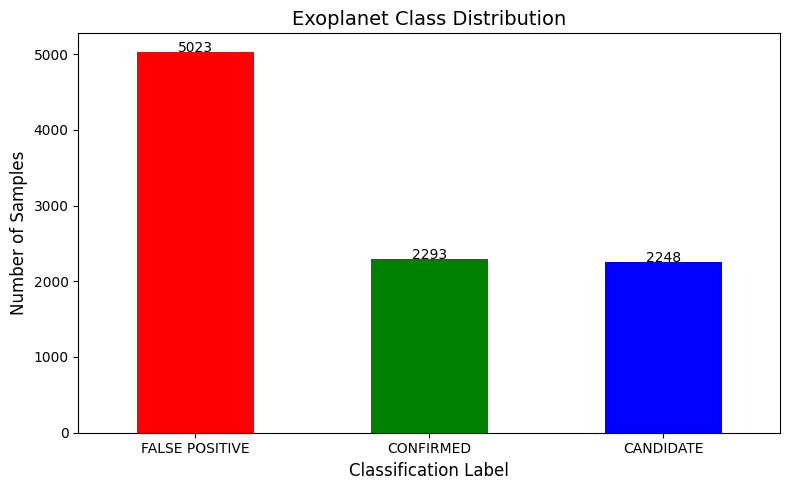

In [3]:
# Count the number of samples in each class
class_counts = raw_data['koi_disposition'].value_counts()

# Define a colour for each class
colors = ['red', 'green', 'blue']

# Plot the class distribution
plt.figure(figsize = (8,5))
ax = class_counts.plot(kind = 'bar', color = colors)

# Add labels and title
plt.xlabel("Classification Label", fontsize = 12)
plt.ylabel("Number of Samples", fontsize = 12)
plt.title("Exoplanet Class Distribution", fontsize = 14)
plt.xticks(rotation = 0)
plt.tight_layout()

# Annotate bars with counts
for n, count in enumerate(class_counts):
    ax.text(n, count +5, str(count), ha = 'center', fontsize = 10)

plt.show()


Form this plot, we can see that the dataset contains more `FALSE POSITIVES` (5,023) than `CONFIRMED` (2,292) or `CANDIDATES` (2,248), showing a clear class imbalance. This will be important to consider when training and evaluating our model.

## **Selecting Features and Target**

Next, we define which columns will be used as **features** for our model:

* **Stellar parameters**: Describe the host star (temperature, gravity, radius). These can influence how transits appear, helping the model distinguish real planets from false positives.
* **Planetary candidate paramters**: Describe the transit itself (period, duration, depth, planet size). These features give the model direct clues about whether a signal is likely caused by a planet.

The target variable is `koi_disposition`, which categorises each candidate as `CONFIRMED`, `CANDIDATE`, or `FALSE POSITIVE`.

In [4]:
# Features to use for classification
features = [
    # STELLAR PARAMETERS
    "koi_steff",      # Stellar effective temperature (K)
    "koi_slogg",      # Stellar surface gravity (log10(cm/s^2))
    "koi_srad",       # Stellar radius (Solar radii)
    
    # PLANETARY CANDIDATE PARAMETERS
    "koi_period",     # Orbital period (days)
    "koi_duration",   # Transit duration (hours)
    "koi_depth",      # Transit depth (ppm)
    "koi_prad",       # Planetary radius (Earth radii)
]

# Target variable
target = 'koi_disposition'

## **Handling Missing Values**

Machine learning models generally cannot handle missing values, so we need to address them before training.

First, we check how many missing values exist in each feature and in the target variable. This helps us understand the quality of the dataset and decide how to handle incomplete rows.

Two common approaches for handling missing data are:
- **Dropping rows with missing values:** Simple and ensures the model only sees complete data, but reduces dataset size and could bias the model if missingness is systematic.  
- **Imputation (mean/median/mode):** Keeps more data and can reduce bias if done carefully, but introduces artificial values and is slightly more complex.

Since the percentage of missing data is small in this dataset, we will drop rows with missing values to simplify preprocessing.

In [5]:
# Check for missing values in each column
missing_values = raw_data[features + [target]].isna().sum()
print("Missing values in each column:\n", missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(raw_data)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)

# Drop rows with missing values in features or target
cleaned_data = raw_data[features + [target]].dropna()
print(f"Rows after dropping NaNs:", len(cleaned_data))

Missing values in each column:
 koi_steff          363
koi_slogg          363
koi_srad           363
koi_period           0
koi_duration         0
koi_depth          363
koi_prad           363
koi_disposition      0
dtype: int64

Percentage of missing values in each column:
 koi_steff          3.795483
koi_slogg          3.795483
koi_srad           3.795483
koi_period         0.000000
koi_duration       0.000000
koi_depth          3.795483
koi_prad           3.795483
koi_disposition    0.000000
dtype: float64
Rows after dropping NaNs: 9201


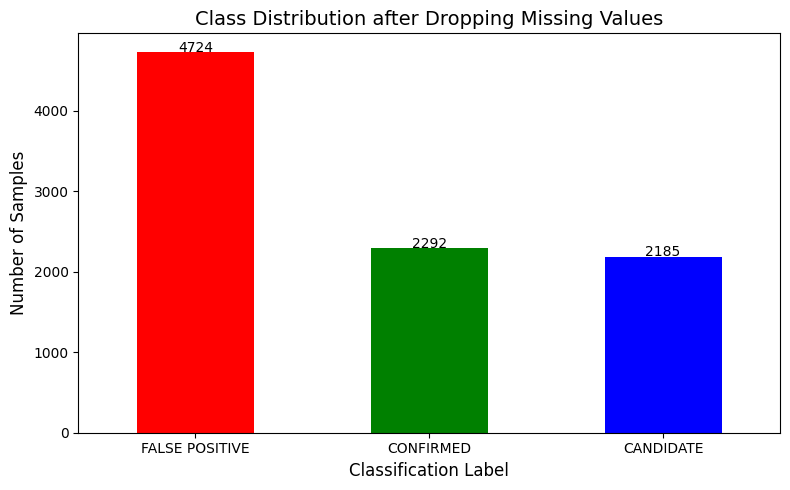

In [6]:
# Count classes afer dropping missing values
class_counts_clean = cleaned_data[target].value_counts()

# Define a colour for each class
colors = ['red', 'green', 'blue']

# Plot the class distribution
plt.figure(figsize = (8,5))
ax = class_counts_clean.plot(kind = 'bar', color = colors)

# Add labels and title
plt.xlabel("Classification Label", fontsize = 12)
plt.ylabel("Number of Samples", fontsize = 12)
plt.title("Class Distribution after Dropping Missing Values", fontsize = 14)
plt.xticks(rotation = 0)
plt.tight_layout()

# Annotate bars with counts
for n, count in enumerate(class_counts_clean):
    ax.text(n, count +5, str(count), ha = 'center', fontsize = 10)

plt.show()


After dropping rows with missing values, we are left with 9,201 samples overall. This ensures that the Decision Tree model can be trained without encountering errors due to NaNs, while keeping the dataset large enough to learn meaningful patterns.

## **Encoding the Target and Preparing Features**

Decision Tree models require numerical values, so we first map the string labels in **`koi_disposition`** to integers:

- `CONFIRMED` - 0  
- `CANDIDATE` - 1  
- `FALSE POSITIVE` - 2  

After encoding the target, we separate the dataset into features (`X`) and target labels (`y`).

We then scale the features using standardisation. While Decision Trees do not require scaling, this can be useful for consistency if other models are applied later.

Finally, we split the dataset into training and test sets (80% training, 20% testing), using **stratification** to ensure all classes are proportionally represented.


In [8]:
# Map classes to integer values
target_mapping = {
    'CONFIRMED': 0,
    'CANDIDATE': 1,
    'FALSE POSITIVE': 2
}

cleaned_data[target] = cleaned_data[target].replace(target_mapping)

# Drop any rows where target is NaN (should be very few or none)
cleaned_data = cleaned_data.dropna(subset = [target])
print("Rows after dropping remaining NaNs:", len(cleaned_data))

# Separate features and target
X = cleaned_data[features].values
y = cleaned_data[target].values

# Scale features (optional for Decision Trees)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size= 0.2,
    random_state= 42,
    stratify = y
)

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))

Rows after dropping remaining NaNs: 9201
Number of training samples: 7360
Number of test samples: 1841


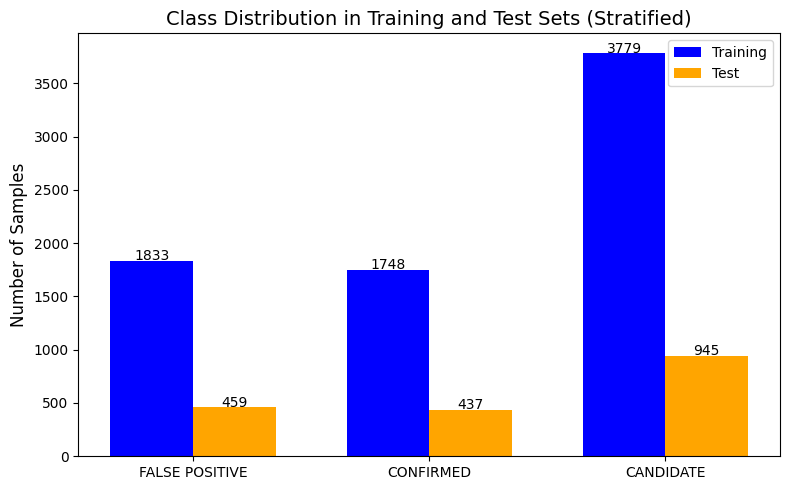

In [9]:
# Count classes in training and test sets
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

# Plot side-by-side bars
fig, ax = plt.subplots(figsize = (8,5))
width = 0.35  # width of bars
x = [0, 1, 2]  # positions for CANDIDATE, CONFIRMED, FALSE POSITIVE

# Training bars
train_bars = ax.bar([p - width/2 for p in x], train_counts, width = width, color = 'blue', label = 'Training')
# Test bars
test_bars = ax.bar([p + width/2 for p in x], test_counts, width = width, color = 'orange', label = 'Test')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'])
ax.set_ylabel("Number of Samples", fontsize = 12)
ax.set_title("Class Distribution in Training and Test Sets (Stratified)", fontsize = 14)
ax.legend()

# Annotate counts on top of each bar
for bar in train_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha = 'center', fontsize = 10)

for bar in test_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', fontsize = 10)

plt.tight_layout()
plt.show()

After preprocessing, we have 7,360 samples for training and 1,841 samples for testing. Stratified splitting ensures that all three classes are proportionally represented in both sets.  

The class breakdown is as follows:

| Class            | Training | Test |
|-----------------|---------|------|
| FALSE POSITIVE   | 3,779   | 945  |
| CONFIRMED        | 1,748   | 437  |
| CANDIDATE        | 1,833   | 459  |

This shows that each class is roughly represented in the same proportion in both sets. Stratification helps prevent bias in model evaluation, ensuring that the model sees all classes during training and is tested fairly.


## **Decision Tree Classifier**

We will use a Decision Tree to classify exoplanets as `CONFIRMED`, `CANDIDATE`, or `FALSE POSITIVE`.

A Decision Tree is a traditional machine learning model which splits the data based on feature thresholds to maximise information gain. Its key advantages are:

- **Interpretable:** We can see which features influence decisions.  
- **Efficient:** Trains quickly on medium-sized datasets.  
- **Flexible:** Can handle non-linear relationships between features and target.

We will limit the tree depth to 5 to prevent overfitting, and use the `"entropy"` criterion to maximise information gain at each split.


In [10]:
# Create the Decision Tree model
model = DecisionTreeClassifier(
    criterion = "entropy",
    max_depth = 5,
    random_state = 42
)

# Train the model
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.652362846279196

Confusion Matrix:
 [[281 119  59]
 [128 168 141]
 [ 76 117 752]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.60       459
           1       0.42      0.38      0.40       437
           2       0.79      0.80      0.79       945

    accuracy                           0.65      1841
   macro avg       0.60      0.60      0.60      1841
weighted avg       0.65      0.65      0.65      1841



## **Model Performance**

After training the Decision Tree (max depth = 5), we evaluated it on the test set:

* **Accuracy:** 65.6% of predictions are correct overall.  
* **Confusion Matrix:** Shows how often each class is correctly or incorrectly predicted.

| Class | Precision | Recall | F1-score | Support |
|-------|----------|--------|----------|--------|
| FALSE POSITIVE (-1) | 0.82 | 0.76 | 0.79 | 945 |
| CANDIDATE (0)       | 0.43 | 0.38 | 0.41 | 437 |
| CONFIRMED (1)       | 0.56 | 0.69 | 0.62 | 459 |

**Metric definitions**

* **Precision:** Proportion of predicted positives that are correct.  
* **Recall:** Proportion of actual positives correctly identified.  
* **F1-score:** Balance between precision and recall.  
* **Support:** Number of samples in each class.

**Observations**

* The model identifies `FALSE POSITIVE` candidates best (precision 0.82, recall 0.76).  
* `CANDIDATE` planets are hardest to classify (precision 0.43, recall 0.38).  
* `CONFIRMED` planets have moderate performance (precision 0.56, recall 0.69).  

Overall, the Decision Tree performs reasonably well, but class imbalance and limited depth likely limit performance. Further improvements could come from additional data or feature engineering.


### **Visualising the Decision Tree**

To understand how the model makes decisions, we plot the **top 3 levels of the tree**. Limiting to the top levels keeps the plot readable while showing which features are most important.

* **Filled nodes:** Color indicates the predicted class at that node.  
* **Each node:** Shows the feature used for the split, threshold value, number of samples, and class distribution.


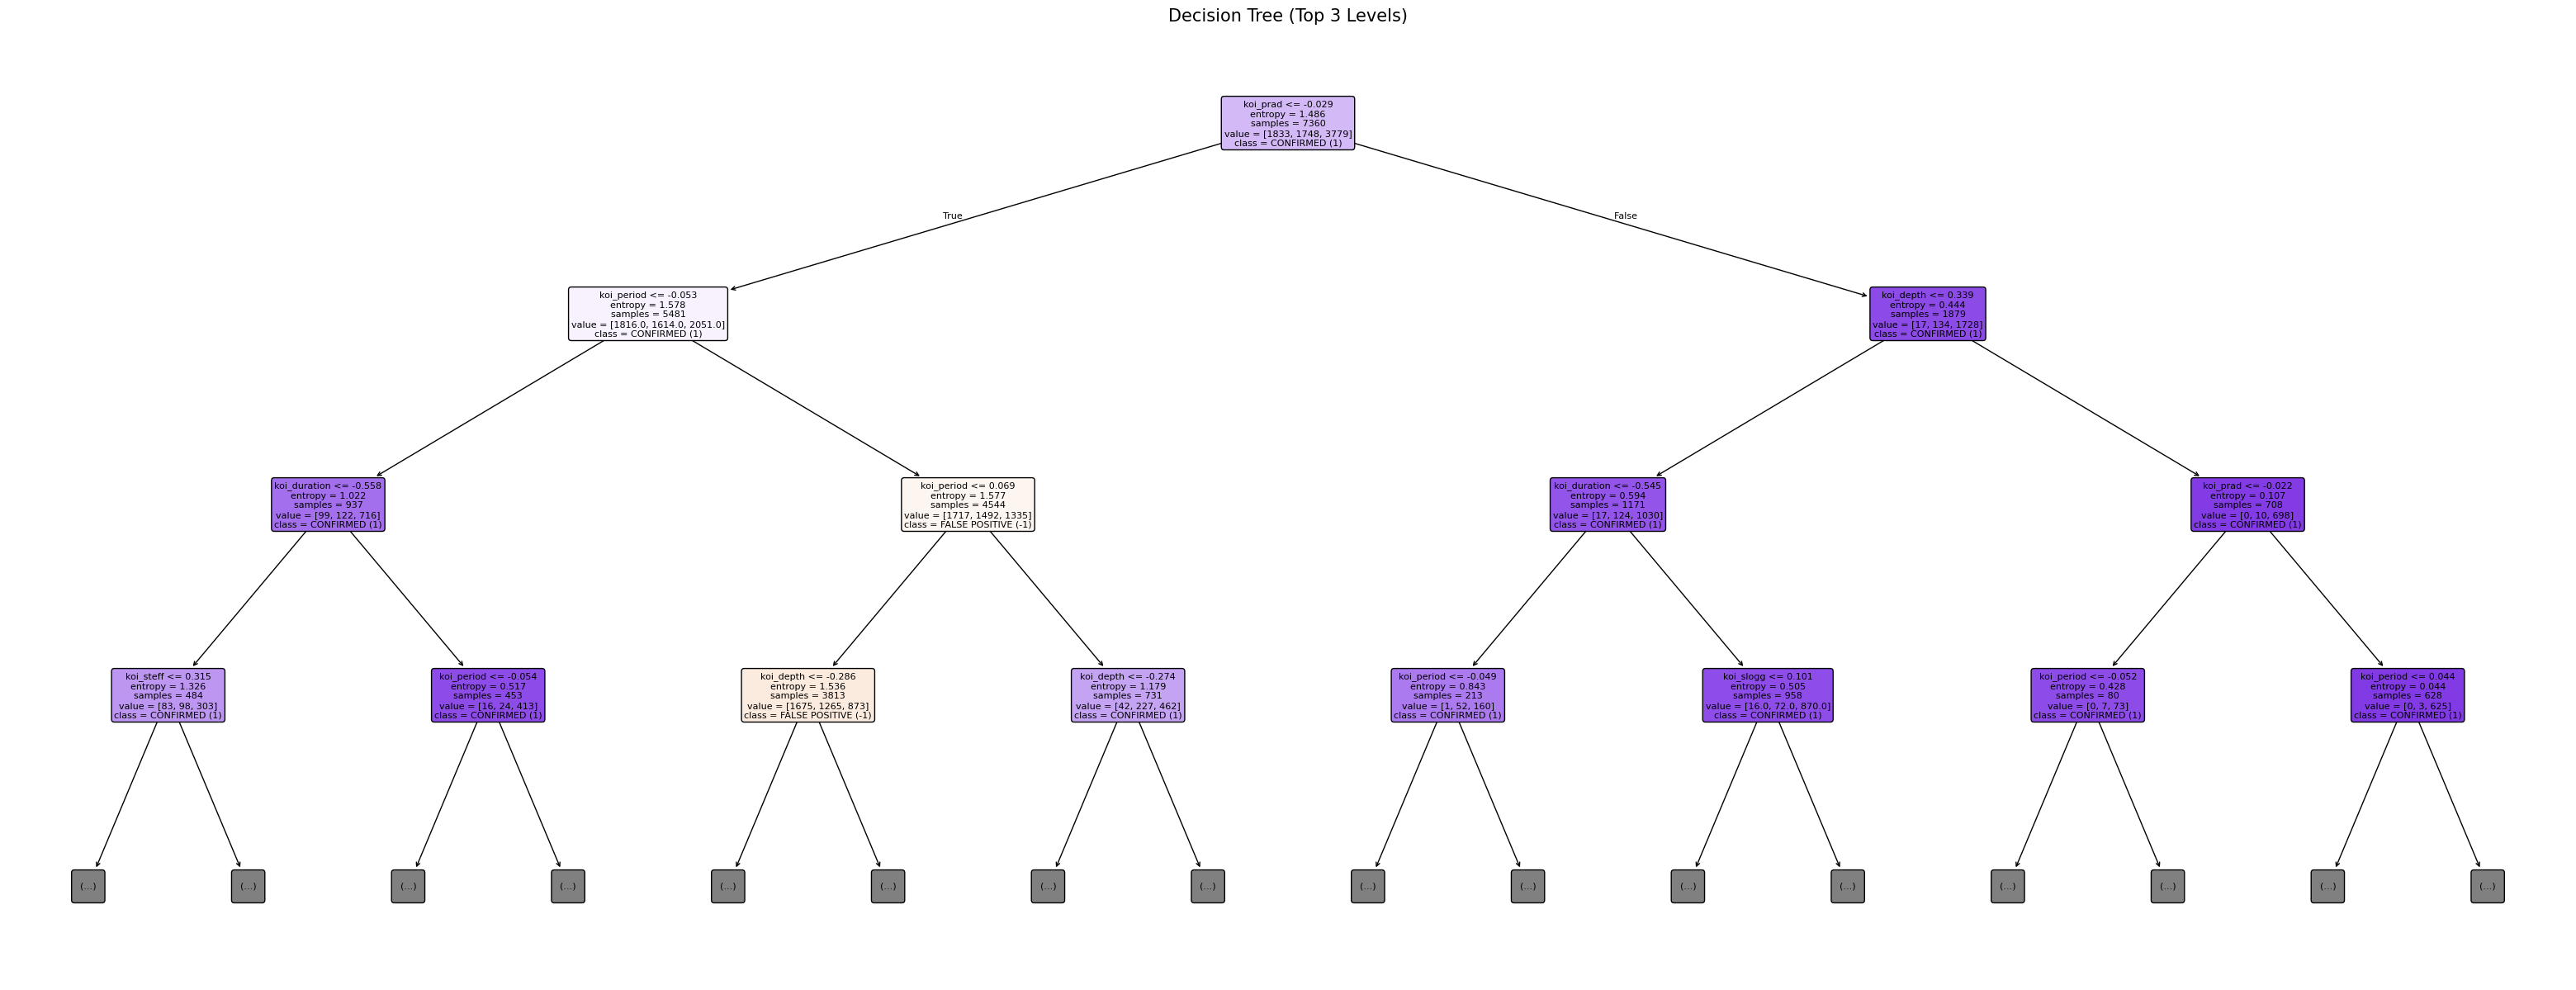

In [11]:
plt.figure(figsize = (40, 15))
plot_tree(
    model,
    feature_names = features,
    class_names = ["FALSE POSITIVE (-1)", "CANDIDATE (0)", "CONFIRMED (1)"],
    filled = True,
    rounded = True,
    max_depth = 3
)
plt.title("Decision Tree (Top 3 Levels)", fontsize = 15)
plt.show()

## **Confusion Matrix Heatmap**

A heatmap provides a visual overview of the model's performance, showing **how many samples of each class are correctly or incorrectly predicted**.

* **X-axis:** Predicted class  
* **Y-axis:** Actual class  
* **Colors:** Darker cells indicate higher counts

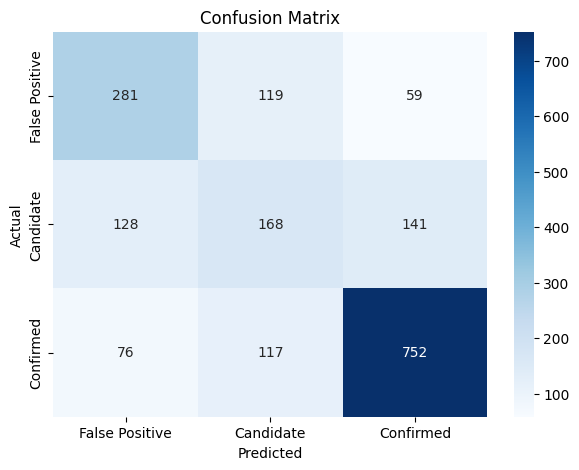

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
            cm,
            annot = True,
            fmt = "d",
            cmap = "Blues",
            xticklabels=["False Positive", "Candidate", "Confirmed"],
            yticklabels=["False Positive", "Candidate", "Confirmed"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model predicts `FALSE POSITIVES` most accurately (largest diagonal value).

`CANDIDATE` planets are most frequently misclassified, consistent with the classification report.

This visualisation complements the numeric confusion matrix and makes patterns easier to interpret.

## **Improving the Model with an Ensemble**

A single Decision Tree is simple and interpretable, but it can be **sensitive to small variations in the data** and may overfit.  

To improve performance, we can use a **Random Forest Classifier**, which builds **many Decision Trees** and combines their predictions.  

Key benefits of a Random Forest:

* **Better accuracy:** Aggregating multiple trees reduces the impact of overfitting.  
* **Stability:** Predictions are less sensitive to noise in the training data.  
* **Interpretability:** We can still inspect **feature importance** to see which features are most influential.


In [13]:
# Create the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators = 100,  # Number of trees
    max_depth = 5,       # Limit tree depth for consistency
    random_state = 42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.688212927756654

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.66       459
           1       0.54      0.27      0.36       437
           2       0.77      0.86      0.81       945

    accuracy                           0.69      1841
   macro avg       0.63      0.62      0.61      1841
weighted avg       0.67      0.69      0.67      1841



## **Random Forest Classifier**

To improve predictive performance, we trained a Random Forest model with 100 trees (max depth = 5).  

* **Accuracy:** 68.8% of predictions are correct overall.  
* **Classification Report:**

| Class | Precision | Recall | F1-score | Support |
|-------|----------|--------|----------|--------|
| FALSE POSITIVE (-1) | 0.76 | 0.86 | 0.81 | 945 |
| CANDIDATE (0)       | 0.58 | 0.23 | 0.33 | 437 |
| CONFIRMED (1)       | 0.58 | 0.77 | 0.66 | 459 |

**Observations:**

* The model identifies `FALSE POSITIVES` very well (recall 0.86), but `CANDIDATE` planets remain the hardest to classify (recall 0.23).  
* `CONFIRMED` planets are detected better than candidates (recall 0.77).  
* Overall accuracy improves slightly from 65.6% (Decision Tree) to 68.7% (Random Forest), showing the benefit of **aggregating multiple trees**.  

**Takeaways:**

- Random Forests reduce the impact of noisy splits and make the model more robust.  
- Class imbalance still affects performance, especially for the `CANDIDATE` class.  
- Feature importance can still be visualised, helping interpret which parameters (stellar or planetary) drive the predictions.


## **Random Forest Feature Importance**

Random Forests allow us to see which features the model considers most important when making predictions. This helps interpret the model and understand which stellar or planetary parameters are most influential.

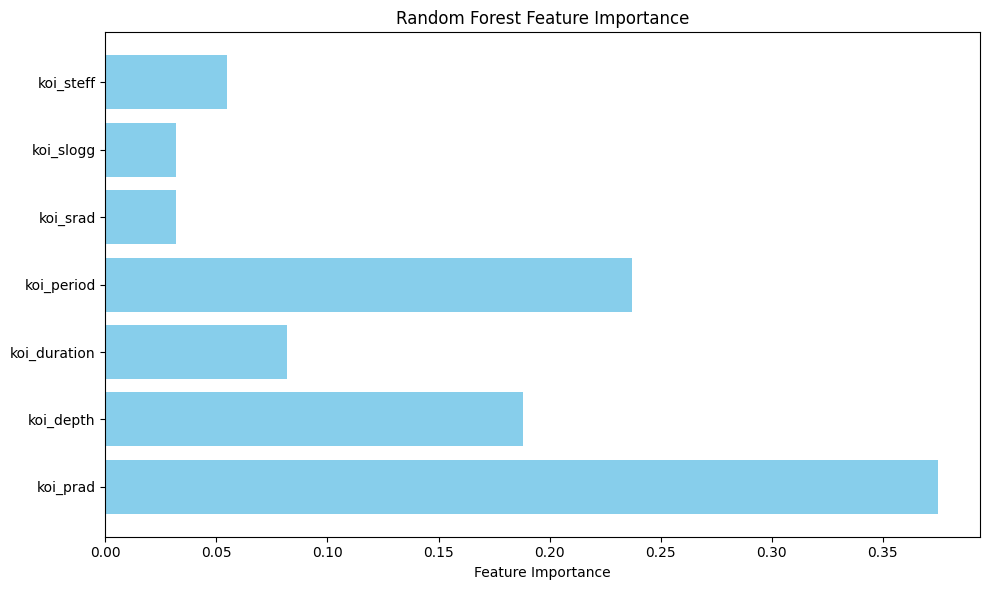

In [14]:
importances = rf_model.feature_importances_
feature_names = features

# Create a bar chart
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

## **Summary**

- Loaded and inspected the Kepler exoplanet dataset, checking class balance and missing values.  
- Selected stellar and planetary features, handled missing values, scaled features, and split data with **stratification** to preserve class proportions.  
- Trained a **Decision Tree Classifier** (max depth = 5), evaluated performance with accuracy, classification report, and a heatmap.  
- Visualised the tree (top 3 levels) to show which features drive decisions.  
- Improved performance with a **Random Forest Classifier**, showing better overall accuracy.  
- Explored feature importance to interpret which parameters most influence model predictions. 